In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

from ml_models.pocketpla import PocketPLA

%matplotlib inline

In [2]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8 ]
directory = '../data/filtered_digit_dataset/'
X_tests = []
Y_tests = []
X_trains = []
Y_trains = []

for l in labels:

    
    filename_x_test = str(l) + '_x_test.txt'
    filename_y_test = str(l) + '_y_test.txt'

    filename_x_train = str(l) + '_x_train.txt'
    filename_y_train = str(l) + '_y_train.txt'
    x_test = np.loadtxt(directory + filename_x_test, dtype = float)
    y_test = np.loadtxt(directory + filename_y_test, dtype = int)

    x_train = np.loadtxt(directory + filename_x_train, dtype = float)
    y_train = np.loadtxt(directory + filename_y_train, dtype = int)

    X_tests.append(x_test)
    Y_tests.append(y_test)

    X_trains.append(x_train)
    Y_trains.append(y_train)





In [3]:
import numpy as np

class LinearRegression:
    def execute(self, _X, _y):
        X = np.array(list(map(lambda x: [1, x[0], x[1]], _X)))


        X =  np.array(X)
        y =  np.array(_y)
        xTx = np.dot(X.transpose(), X)
        inverse = np.linalg.inv(xTx)
        self.w = np.dot(np.dot( inverse, X.transpose()), y)
    
    def predict(self, _x):

        X = np.array(list(map(lambda x: [1, x[0], x[1]], _x)))

        return [np.dot(self.w, xn) for xn in X]
    
    def getOriginalY(self, originalX):
        return (-self.w[0] - self.w[1]*originalX) / self.w[2]

    def get_w(self):
        return self.w

In [4]:
# from linearregression import LinearRegression
# from pla import PLA

# class LRClassifier():
#     def execute(self, _X, _y):
#         lr = LinearRegression()
#         lr.execute(_X, _y)
#         self.w = lr.get_w()
        
#         #pla = PLA()
#         #pla.set_w(self.w)
#         #pla.execute(_X, _y)
#         #self.w = pla.get_w()
        
        
#     def predict(self, x):
#         return np.sign(np.dot(self.w, x))
     
#     def getRegressionY(self, regressionX, shift=0):
#         return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [5]:
directory = '../data/filtered_digit_dataset/'
filename_x_test = '1x5_x_test.txt'
filename_y_test = '1x5_y_test.txt'

filename_x_train = '1x5_x_train.txt'
filename_y_train = '1x5_y_train.txt'

size_train = 500
size_test = 250

x_test_1x5 = np.loadtxt(directory + filename_x_test, dtype = float)
y_test_1x5 = np.loadtxt(directory + filename_y_test, dtype = int)

x_test_1x5 = x_test_1x5[:size_test]
y_test_1x5 = y_test_1x5[:size_test]


x_train_1x5 = np.loadtxt(directory + filename_x_train, dtype = float)
y_train_1x5 = np.loadtxt(directory + filename_y_train, dtype = int)

x_train_1x5 = x_train_1x5[:size_train]
y_train_1x5 = y_train_1x5[:size_train]


In [6]:
clf = PocketPLA()
clf.fit(x_train_1x5, y_train_1x5, max_iter=500)
predict_y = clf.predict(x_test_1x5)
w = clf.get_w()


KeyboardInterrupt: 

In [ ]:
w

array([2985.        ,  -25.85882353,  -18.94117647])

In [ ]:
clf.score(x_test_1x5, y_test_1x5)

0.852

In [ ]:
predict_y = clf.predict(x_test_1x5)


In [ ]:
print(classification_report(y_test_1x5, predict_y))
print(confusion_matrix(y_test_1x5, predict_y))

              precision    recall  f1-score   support

          -1       0.89      0.80      0.84       122
           1       0.82      0.91      0.86       128

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250

[[ 97  25]
 [ 12 116]]


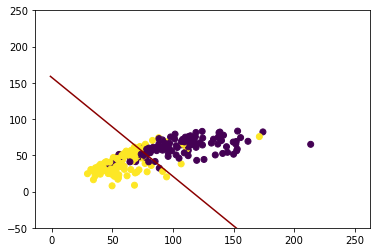

In [ ]:
plt.scatter(x_test_1x5[:, 0], x_test_1x5[:, 1], c=list(np.sign(y_test_1x5).ravel()) )
x = np.linspace(-1, 250, 1000)


size = 250
plt.ylim(-50, size)


plt.plot(x, (-w[0] - w[1]*x) / w[2], color='darkred')
# plt.plot(x, (-clf.intercept_-clf.coef_[0]*x)/clf.coef_[1], color='darkred')


In [ ]:
clf = LinearRegression()
clf.execute(x_train_1x5, y_train_1x5)
predict_y = clf.predict(x_test_1x5)
w = clf.get_w()

In [ ]:
w

array([ 1.97705491, -0.01544544, -0.01533181])

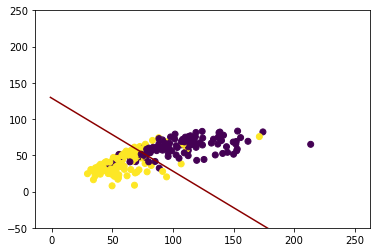

In [ ]:
plt.scatter(x_test_1x5[:, 0], x_test_1x5[:, 1], c=list(np.sign(y_test_1x5).ravel()) )
x = np.linspace(-1, 250, 1000)


size = 250
plt.ylim(-50, size)
xOri = [-1, +1]
yOri = [clf.getOriginalY(xOri[0]), clf.getOriginalY(xOri[1])]

plt.plot(x, (-w[0] - w[1]*x) / w[2], color='darkred')


In [18]:
import numpy as np
from numpy import linalg as LA
import random


class LogisticRegression:
    def __init__(self, eta=0.1, tmax=30, batch_size=32, lam=0):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = batch_size
        self.lam = lam

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        self.w = []    
        X = np.concatenate((np.ones((len(_X),1), dtype=np.float128), np.array(_X, dtype=np.float128)), axis=1)
        y = np.array(_y, dtype=np.float128)
        
        d = X.shape[1]
        N = X.shape[0]
        w = np.zeros(d, dtype=np.float128)
    
        
        for i in range(self.tmax):
            vsoma = np.zeros(d, dtype=np.float128)

            #Escolhendo o lote de entradas
            if self.batch_size < N:
                indices = random.sample(range(N),self.batch_size)
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y

            #computando o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))
        
            gt = vsoma/self.batch_size 
            if self.lam != 0:
              gt += 2*self.lam * w
            
            #Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if LA.norm(gt) < 0.0001 :
                break
            w = w + (self.eta*gt)

        self.w = w

    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        return [(1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) for x in X]

    #Predicao por classificação linear
    def predict(self, X):
        return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5 
                else -1 for x in X]

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [19]:
clf = LogisticRegression(tmax=50000)
clf.fit(x_train_1x5, y_train_1x5)
predict_y = clf.predict(x_test_1x5)
predict_y_prob = clf.predict_prob(x_test_1x5)


w = clf.getW()

In [16]:
print(classification_report(y_test_1x5, predict_y))
print(confusion_matrix(y_test_1x5, predict_y))

              precision    recall  f1-score   support

          -1       0.85      0.84      0.84       122
           1       0.85      0.86      0.85       128

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[102  20]
 [ 18 110]]


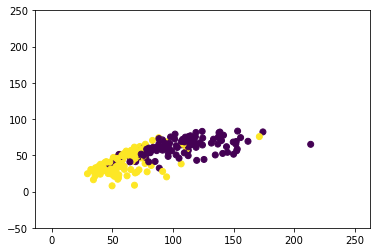

In [17]:
plt.scatter(x_test_1x5[:, 0], x_test_1x5[:, 1], c=list(np.sign(y_test_1x5).ravel()) )
x = np.linspace(-1, 250, 1000)


size = 250
plt.ylim(-50, size)


plt.plot(x, clf.getRegressionY(x), color='darkred')


In [ ]:

W = []


for l in labels:
    print('label = ', l)
    x_test = X_tests[l]
    y_test = Y_tests[l]

    x_train = X_trains[l]
    y_train = Y_trains[l]


    clf = PocketPLA()
    clf.fit(x_train, y_train, max_iter=500)
    predict_y = clf.predict(x_test)
    w = clf.get_w()

    print(clf.score(x_test, y_test))

    W.append(w)



label =  0
0.9
label =  1
0.91
label =  2
0.859
label =  3
0.869
label =  4
0.826
label =  5


KeyboardInterrupt: 

In [ ]:
def predict(x_test, w):
    predict_y = np.zeros(len(x_test))
    for i in range(len(x_test)):
            
        g = np.sign(w[0] + w[1]*x_test[i][0] + w[2]*x_test[i][1])
            
        predict_y[i] = g

        
    return predict_y


def score(X, Y):

    return accuracy_score(Y, predict(X))
    

In [ ]:
i = 0

x_test = X_tests[i]
y_test = Y_tests[i]
predict_y = predict(x_test, W[i])



print(classification_report(y_test, predict_y))
print(confusion_matrix(y_test, predict_y))

              precision    recall  f1-score   support

          -1       0.90      1.00      0.95       895
           1       0.69      0.09      0.15       105

    accuracy                           0.90      1000
   macro avg       0.80      0.54      0.55      1000
weighted avg       0.88      0.90      0.86      1000

[[891   4]
 [ 96   9]]


In [ ]:
def one_vs_rest(X_trains, Y_trains, W):
    pass

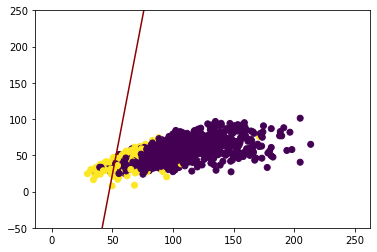

In [ ]:
l = 1
x_test = X_tests[l]
y_test = Y_tests[l]

x_train = X_trains[l]
y_train = Y_trains[l]

w = W[l]

plt.scatter(x_test[:, 0], x_test[:, 1], c=list(np.sign(y_test).ravel()) )
x = np.linspace(-1, 250, 1000)


size = 250
plt.ylim(-50, size)


plt.plot(x, (-w[0] - w[1]*x) / w[2], color='darkred')
# plt.plot(x, (-clf.intercept_-clf.coef_[0]*x)/clf.coef_[1], color='darkred')


In [ ]:
# clf = PocketPLA()
# clf.execute(x_train, y_train)
# w = clf.get_w()

# clf = PLA(x_train, y_train)
# clf


# clf2 = PocketPLA()
# clf2.fit(x_train, y_train)
# predict_y = clf.predict(x_test)
# w = clf.get_w()
# clf.score(x_test, y_test)

In [ ]:
clf2 = PocketPLA()
clf2.fit(x_train, y_train, max_iter=1000)

In [ ]:
clf2.score(x_test, y_test)


w1 = clf1.get_w()
print(w1)

w2 = clf2.get_w()
print(w2)

NameError: name 'clf1' is not defined

In [ ]:
predict_y = clf2.predict(x_test)



print(classification_report(y_test, predict_y))
print(confusion_matrix(y_test, predict_y))

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=list(np.sign(y_test).ravel()) )
x = np.linspace(-25, 250, 100)


size = 250
plt.ylim(-50, size)

plt.plot(x, clf1.getOriginalY(x), color='darkred')
plt.plot(x, (-w2[0] - w2[1]*x) / w2[2], color='red')

# plt.plot(x, clf.h(x), color='darkred')

# plt.plot(x, (-clf.intercept_-clf.coef_[0]*x)/clf.coef_[1], color='darkred')
